1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method

if u do the sum a nice curv will appear, then normalize

-36.445736808850995
-36.40978964566518


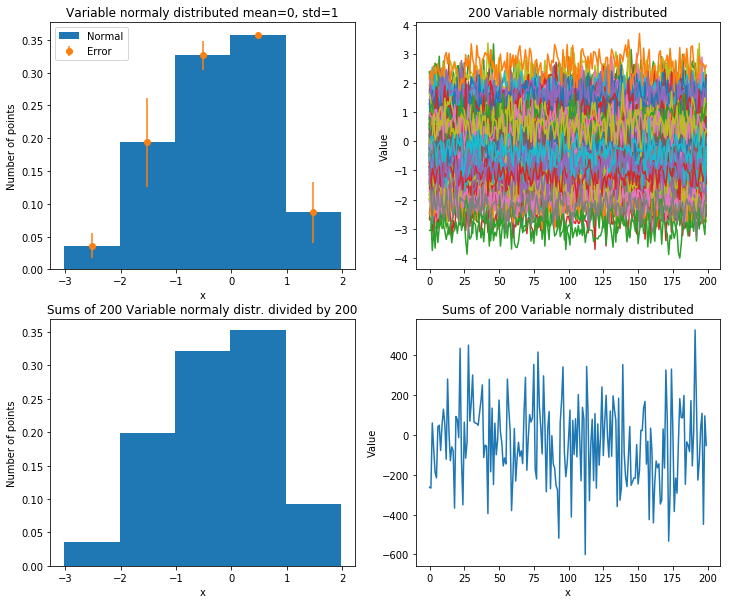

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.integrate import trapz

N = 200
mean, std = 0 , 1
x = np.random.normal(mean, std, N)
xrange = np.arange(x.min()+1/2,x.max()-1/2)

#Layout
fig, (ax, ax2) = plt.subplots(nrows=2, ncols = 2, figsize=(12,10))
ax[0].set_title("Variable normaly distributed mean=0, std=1")
ax[0].set_xlabel("x")
ax[0].set_ylabel("Number of points")

ax[1].set_title("200 Variable normaly distributed")
ax[1].set_xlabel("x")
ax[1].set_ylabel("Value")

ax2[1].set_title("Sums of 200 Variable normaly distributed")
ax2[1].set_xlabel("x")
ax2[1].set_ylabel("Value")

ax2[0].set_title("Sums of 200 Variable normaly distr. divided by 200")
ax2[0].set_xlabel("x")
ax2[0].set_ylabel("Number of points")

# Set the y range
#plt.yticks(np.arange(0,0.5,0.1))

# taking the y value from the plot
hist = ax[0].hist(x, bins=np.arange(x.min(),x.max()), density = True, label="Normal")
yvalue = np.array(hist[0])
xvalue = xrange
#ax.plot(xvalue, yvalue)

# Take the distribution
pdf = norm.pdf(xvalue)
#ax.plot(xvalue, pdf)
err = pdf - yvalue
ax[0].errorbar(xvalue, yvalue, yerr=err, fmt="o", label="Error" )
ax[0].legend()



# Second Part

new_std = 1.06*std*(x.size**(-1/5))
matrix = np.random.normal(0, new_std, (N,N))
for i in range (0,N):
    matrix[:,i] = matrix[:,i] + x[i]
    

ax[1].plot(matrix)
#ax2[0].hist(x)
#ax2[1].hist(matrix)
summ = matrix.sum(axis=0)
ax2[0].hist(summ/200, bins=np.arange(x.min(),x.max()), density = True)
ax2[1].plot(summ)
# ange = (x.max()-x.min())
# y = np.arange(x.min(),x.max(),ange/200)
# print(y.size)
# ax2[1].scatter(x,y)
# Integral matching 
integral = trapz(summ/200)
print(integral)
match = trapz(x)
print(match)


plt.show()

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories **#if u are ambiscius**

In [4]:
def TwoD_Dataset():
    
    # Select means and stds 'randomly'
    means = np.arange(0,4,0.4)
    stds = np.arange(1, 5, 1)
    #mean1 = np.random.choice(means)
    #std1 = np.random.choice(stds)
    #mean2 = np.random.choice(means)
    #std2 = np.random.choice(stds)
    std1= 0.5
    std2 = 0.6
    mean1 = 2
    mean2 = 1
    N = 100
    
     # Creating the two Gaussian
    firstN = np.random.normal(mean1, std1, N)
    secondN = np.random.normal(mean2, std2, N)
#     if mean1>mean2:
#         x = firstN.max()-secondN.min()
#         xrange = np.arange(secondN.min(),firstN.max(), x/N)
        
#     elif mean2>mean1:
#         x = secondN.max()-firstN.min()
#         xrange = np.arange(firstN.min(), secondN.max(), N)
        
#     else:
#         if std1 > std2:
#             x = firstN.max()-firstN.min()
#             xrange = np.arange(first.min(), firstN.max(), x/N)
#         else:
#             x = secondN.max()-secondN.min()
#             xrange = np.arange(secondN.min(), secondN.max(), x/N)
     
    x1 = firstN.max()-firstN.min()
    x1range = np.arange(firstN.min(), firstN.max(), x1/N)
    x2 = secondN.max()-secondN.min()
    x2range = np.arange(secondN.min(),secondN.max(), x2/N)
    fig, ax = plt.subplots(figsize=(8,6))
    ax.set_title("2D Gaussian")
    ax.set_ylabel("y")
    ax.set_xlabel("x")
    String = "Fisrt Gauss mean "
    ax.scatter(firstN,x1range, c="green", s = 128, marker ="o", label ="First Gauss mean: "+str(mean1)+" std: "+ str(std1))
    ax.scatter(secondN,x2range, c="purple", s = 64, label = "Second Gauss mean: "+str(mean2)+" std: "+str(std2))
#     ax.scatter(xrange , firstN, label ="First Gauss mean: "+str(mean1)+" std: "+ str(std1))
#     ax.scatter(xrange, secondN, label = "Second Gauss mean: "+str(mean2)+" std: "+str(std2))
    ax.legend()

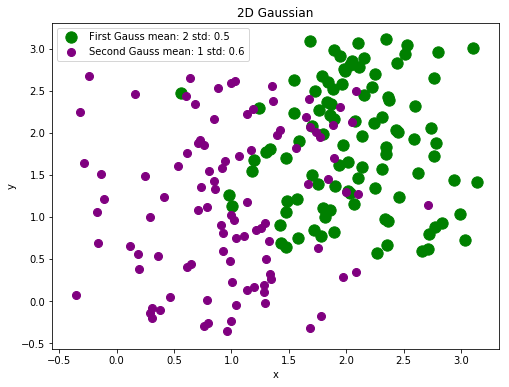

In [329]:
TwoD_Dataset()

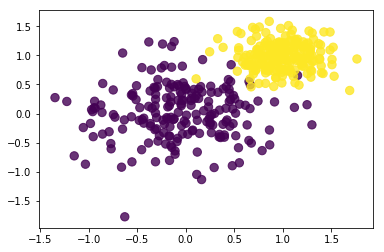

In [242]:
#! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')


3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should you the `np.load()`(devo fare qualcosa per avere the actual numpy array) function to load the file as a numpy array and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot ( the plot has to have the result of the fit display on the plot)
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

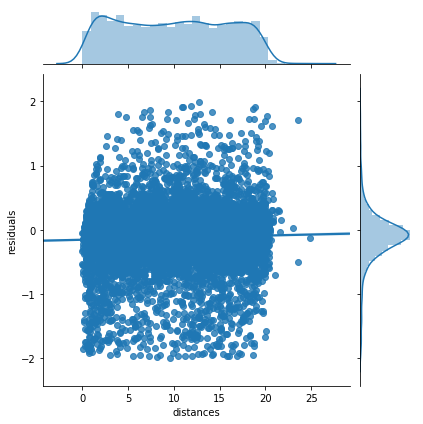

In [11]:
from scipy.stats import linregress
import seaborn as sns

file_name = "/home/stefano/Documents/University/High-Level-Programming/Git/Temp/residuals_261.npy"
x = np.load(file_name)
y = x.item()
data = pd.DataFrame(y)
clean_data = data.where(data["residuals"].abs() < 2)
clean_data = clean_data.dropna(how="any")
y = clean_data["residuals"]
x = clean_data["distances"]
slope, intercept, rvalue, pvalue, stderr = linregress(x, y)

#fig, ax2 = plt.subplots(nrows=1, ncols = 2, figsize=(10,5))
sns.jointplot(x = "distances", y = "residuals", data = clean_data, kind= "reg")
#sns.regplot(y,x)
x = np.arange(0,20,2)
#hist = plt.hist(y, bins = x)
mean_estimate = hist[0]
plt.show()